In [2]:
from qiskit import QuantumCircuit,transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from numpy import pi

## Defining the QFT Function 

In [3]:
def qft_rotations(circuit, n):
    if n == 0: # exit function if circuit is empty
        return circuit
    n -= 1 # indexes start from 0
    circuit.h(n) 
    for qubit in range(n):
        # for each less significant qubit
        # smaller-angled controlled rotation: 
        circuit.cp(pi/2**(n-qubit), qubit, n)

    qft_rotations(circuit, n)

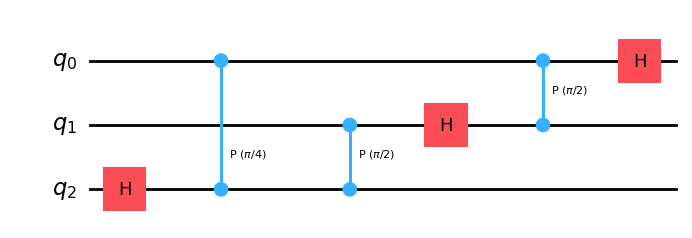

In [4]:
qc = QuantumCircuit(3)
qft_rotations(qc,3)
qc.draw('mpl')

## Function to SWAP Registers after QFT Computation

In [5]:
# function to SWAP the registers 
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

## QFT Function 

In [6]:
# function to apply the QFT to the Quantum Circuit 
def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit

## QFT|000>

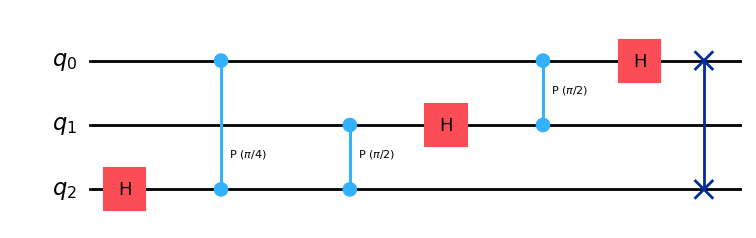

In [7]:
# QFT circuit for a 3 Qubit case at state |000>
qc = QuantumCircuit(3)
qft(qc,3)
qc.draw('mpl')

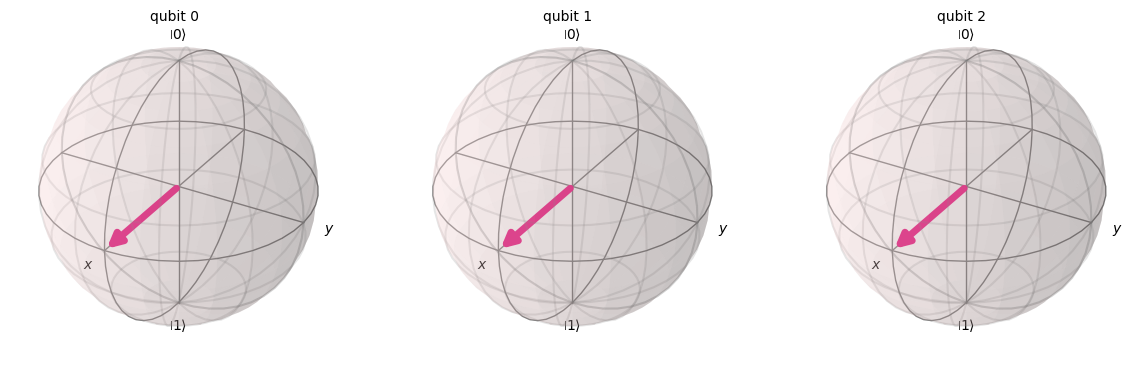

In [36]:
state1 = Statevector(qc)
plot_bloch_multivector(state1)

In [37]:
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import plot_state_city
from qiskit.visualization import plot_state_hinton
from qiskit.visualization import plot_state_paulivec

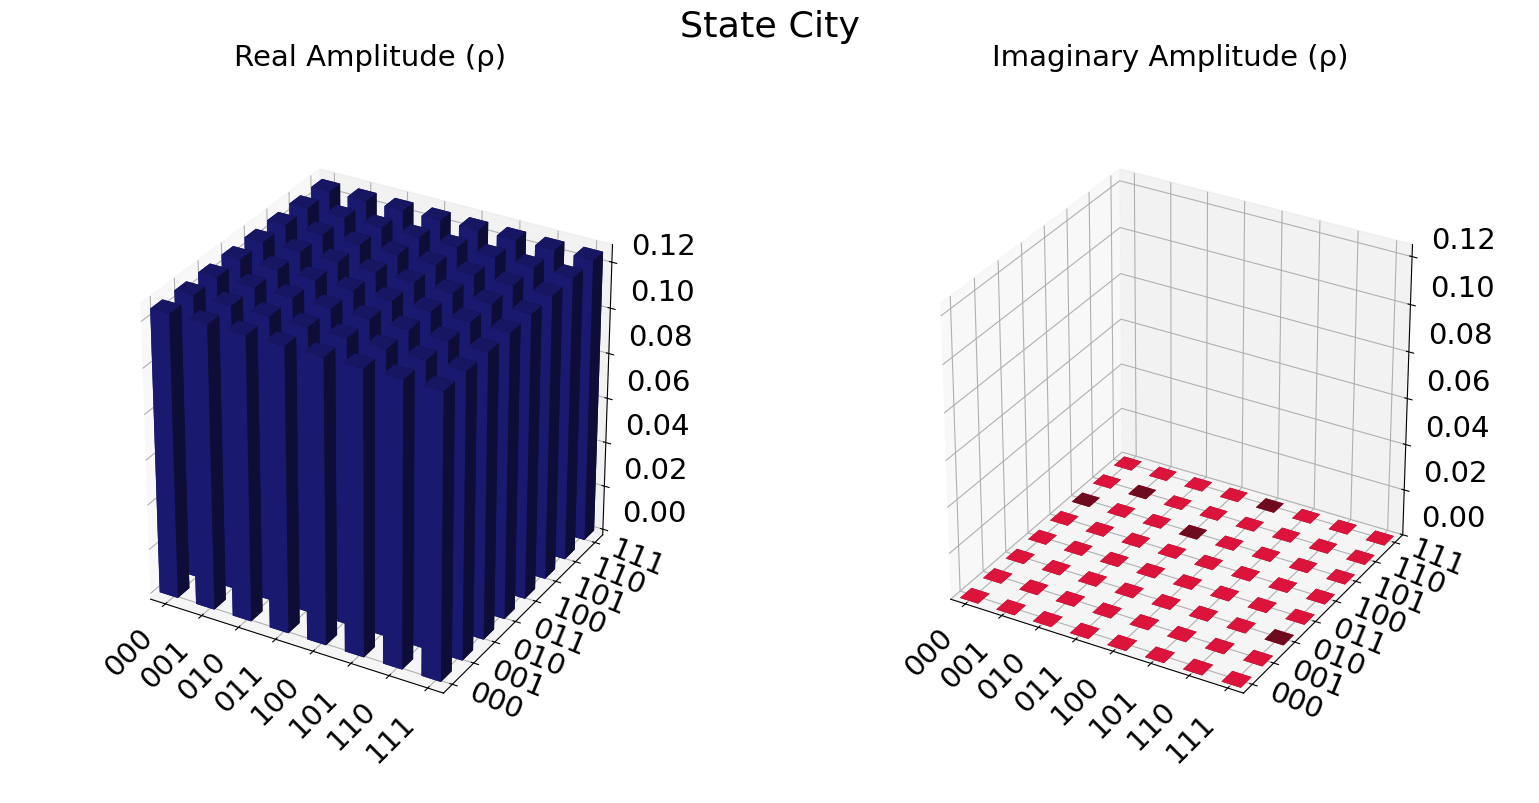

In [38]:
state2 = DensityMatrix(qc)
plot_state_city(state2, color=['midnightblue', 'crimson'], title="State City")

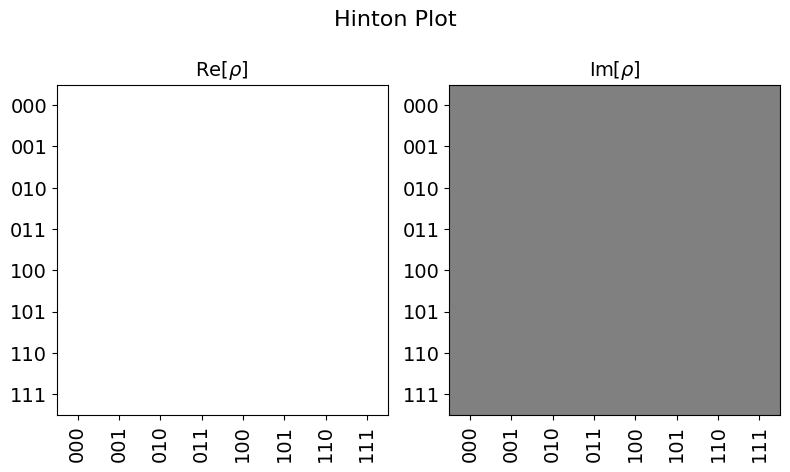

In [39]:
plot_state_hinton(state2, title="Hinton Plot")

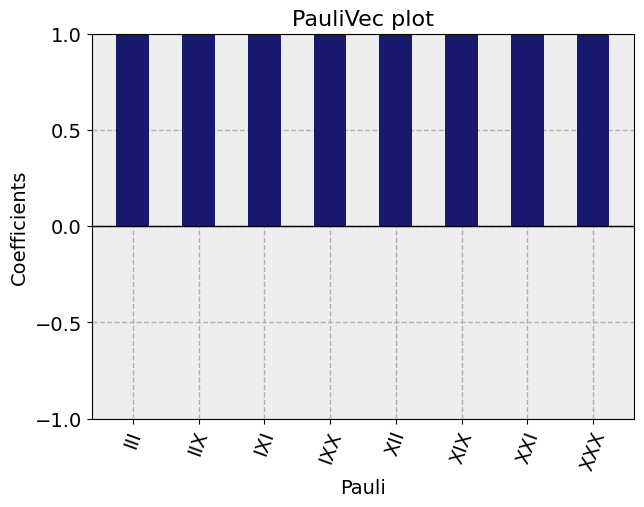

In [40]:
plot_state_paulivec(state1, color='midnightblue', title="PauliVec plot")

In [45]:
print("\nQuantum state is:",state1)


Quantum state is: Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))
